### After Sales Service Data Analytics

1. **Customer Segmentation and Profile Analysis**
Age: Understand age demographics and tailor after-sales services for different age groups. For example, older customers may require more personalized communication or assistance.
Gender: Identify preferences or service expectations based on gender trends.
Loyalty_Score: Segment customers into loyal and non-loyal groups to provide targeted follow-ups or promotions.

2. **Service History and Frequency**
Last_Service_Date: Analyze how recently a customer availed of service to track overdue services or predict future needs.
Service_Frequency: Identify high-frequency service users to determine if certain products require excessive servicing or if they are more engaged with after-sales support.

3. **Product Insights**
Product_Type: Examine which product types require more after-sales service. Identify patterns of complaints or feedback for specific products to improve quality or service offerings.

4. **Customer Satisfaction**
Feedback_Rating: Use feedback ratings to evaluate the quality of after-sales service. Low ratings can indicate service areas that need improvement.
Complaint_Flag: Understand the percentage of customers who file complaints and identify the most common issues to reduce complaints in the future.

5. **Cost and Profitability**
Service_Cost: Analyze the cost incurred for providing services. Identify customers or products that are leading to higher service costs and find ways to optimize processes.
Correlate Service_Cost with Feedback_Rating to evaluate if higher costs result in better satisfaction or if there's room for cost reduction without impacting customer satisfaction.

6. **Retention and Customer Lifetime Value**
Purchase_Date: Analyze the gap between purchase and last service to track the active lifecycle of a customer. Long gaps may indicate disengagement, prompting re-engagement campaigns.
Correlate Loyalty_Score with other factors (like feedback and complaints) to identify predictors of long-term retention.

7. **Complaint and Issue Trends**
Complaint_Flag: Track the percentage of customers flagging complaints. Investigate patterns across product types, age groups, or service frequencies to address common problems.

8. **Service Efficiency**
Compare Service_Frequency with Feedback_Rating to assess whether frequent servicing improves satisfaction or if fewer but more efficient services lead to better outcomes.
Use Last_Service_Date and Purchase_Date to calculate the average time taken for the first service to understand responsiveness.

9. **Predictive Analysis**
Use factors like Age, Service_Frequency, and Product_Type to predict customers likely to require after-sales service soon.
Correlate Loyalty_Score with other metrics (like Feedback Rating or Complaint Flag) to predict future loyalty or churn risks.
10. Personalization Opportunities
Tailor service plans or marketing efforts based on Age, Gender, and Product_Type to increase engagement and satisfaction.
Offer loyalty rewards for customers with high Service_Frequency or Loyalty_Score to encourage continued engagement.

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [185]:
#load dataset
df = pd.read_csv(r'dataset\aftersales.csv')
df.head()

,Customer_ID,Age,Gender,Purchase_Date,Product_Type,Last_Service_Date,Service_Frequency,Feedback_Rating,Complaint_Flag,Service_Cost,Loyalty_Score
0,1,36,Male,2021-08-13,Pickup Truck,2021-08-18,3 months,2,Yes,414,59
1,2,41,Female,2023-01-05,Pickup Truck,2024-12-28,3 months,4,No,306,66
2,3,42,Male,2020-08-09,Sedan,2023-03-31,9 months,3,Yes,454,58
3,4,43,Male,2023-08-09,Sedan,2024-02-04,12 months,2,Yes,419,59
4,5,31,Male,2021-10-11,Pickup Truck,2024-10-21,9 months,1,Yes,452,77


In [186]:
df.shape

(500, 11)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_ID        500 non-null    int64 
 1   Age                500 non-null    int64 
 2   Gender             500 non-null    object
 3   Purchase_Date      500 non-null    object
 4   Product_Type       500 non-null    object
 5   Last_Service_Date  500 non-null    object
 6   Service_Frequency  500 non-null    object
 7   Feedback_Rating    500 non-null    int64 
 8   Complaint_Flag     500 non-null    object
 9   Service_Cost       500 non-null    int64 
 10  Loyalty_Score      500 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 43.1+ KB


In [188]:
df.describe()

,Customer_ID,Age,Feedback_Rating,Service_Cost,Loyalty_Score
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,42.264000,2.978000,300.108000,66.24800
std,144.481833,10.191862,1.459375,109.068897,20.81656
min,1.000000,25.000000,1.000000,101.000000,30.00000
25%,125.750000,34.000000,2.000000,212.750000,47.00000
50%,250.500000,42.000000,3.000000,296.000000,67.00000
75%,375.250000,51.000000,4.000000,385.250000,85.00000
max,500.000000,60.000000,5.000000,500.000000,100.00000


In [189]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Purchase_Date', 'Product_Type',
       'Last_Service_Date', 'Service_Frequency', 'Feedback_Rating',
       'Complaint_Flag', 'Service_Cost', 'Loyalty_Score'],
      dtype='object')

In [190]:
df.isnull().sum()

Customer_ID          0
Age                  0
Gender               0
Purchase_Date        0
Product_Type         0
Last_Service_Date    0
Service_Frequency    0
Feedback_Rating      0
Complaint_Flag       0
Service_Cost         0
Loyalty_Score        0
dtype: int64

Age: Understand age demographics and tailor after-sales services for different age groups. For example, older customers may require more personalized communication or assistance.

In [191]:
#Customer Segmentation and Profile Analysis
bins = [0, 25, 50, 75, 100]
labels = ['0-25', '26-50', '51-75', '76-100']

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,Customer_ID,Age,Gender,Purchase_Date,Product_Type,Last_Service_Date,Service_Frequency,Feedback_Rating,Complaint_Flag,Service_Cost,Loyalty_Score,Age_group
0,1,36,Male,2021-08-13,Pickup Truck,2021-08-18,3 months,2,Yes,414,59,26-50
1,2,41,Female,2023-01-05,Pickup Truck,2024-12-28,3 months,4,No,306,66,26-50
2,3,42,Male,2020-08-09,Sedan,2023-03-31,9 months,3,Yes,454,58,26-50
3,4,43,Male,2023-08-09,Sedan,2024-02-04,12 months,2,Yes,419,59,26-50
4,5,31,Male,2021-10-11,Pickup Truck,2024-10-21,9 months,1,Yes,452,77,26-50


In [192]:
df['Age_group'].value_counts()

Age_group
26-50     356
51-75     144
0-25        0
76-100      0
Name: count, dtype: int64

In [193]:
#Lets check average loyalty by age group
average_loyalty_by_age_group = df.groupby('Age_group')['Loyalty_Score'].mean()
average_loyalty_by_age_group

Age_group
0-25            NaN
26-50     66.553371
51-75     65.493056
76-100          NaN
Name: Loyalty_Score, dtype: float64

Gender        Female       Male
Age_group                      
0-25             NaN        NaN
26-50      67.383721  65.777174
51-75      65.338462  65.620253
76-100           NaN        NaN


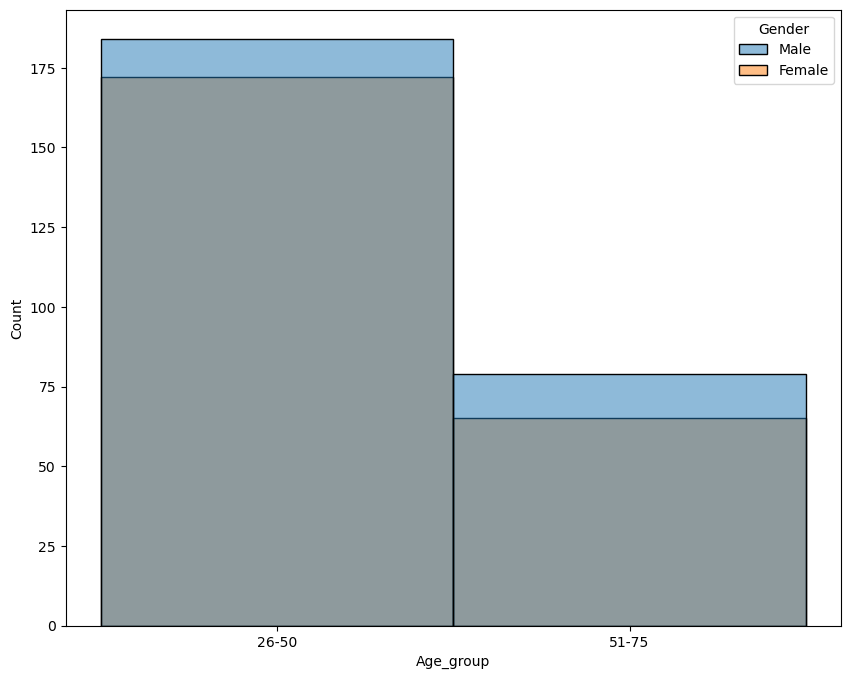

In [194]:
#Lets check genderwise Loyalty score and also by age group

gender_loyalty_score_by_age_group = df.groupby(['Age_group', 'Gender'])['Loyalty_Score'].mean()

gender_loyalty_table = gender_loyalty_score_by_age_group.unstack()

print(gender_loyalty_table)

plt.figure(figsize=(10,8))
sns.histplot(df, x='Age_group', hue='Gender')
plt.show()

In [195]:
#split service frequency into 2 columns 
df[['Service_Value', 'Service_Unit']] = df['Service_Frequency'].str.split(' ', expand=True)
df.head(3)

,Customer_ID,Age,Gender,Purchase_Date,Product_Type,Last_Service_Date,Service_Frequency,Feedback_Rating,Complaint_Flag,Service_Cost,Loyalty_Score,Age_group,Service_Value,Service_Unit
0,1,36,Male,2021-08-13,Pickup Truck,2021-08-18,3 months,2,Yes,414,59,26-50,3,months
1,2,41,Female,2023-01-05,Pickup Truck,2024-12-28,3 months,4,No,306,66,26-50,3,months
2,3,42,Male,2020-08-09,Sedan,2023-03-31,9 months,3,Yes,454,58,26-50,9,months


In [196]:
#Lets check Product types requiring high frequency service
high_frequency_product_type = df.groupby(['Product_Type', 'Service_Frequency'])['Service_Frequency'].count()
high_frequency_product_type

Product_Type  Service_Frequency
Hatchback     12 months            28
              3 months             18
              6 months             38
              9 months             28
Pickup Truck  12 months            25
              3 months             36
              6 months             37
              9 months             30
SUV           12 months            34
              3 months             39
              6 months             28
              9 months             26
Sedan         12 months            23
              3 months             39
              6 months             30
              9 months             41
Name: Service_Frequency, dtype: int64

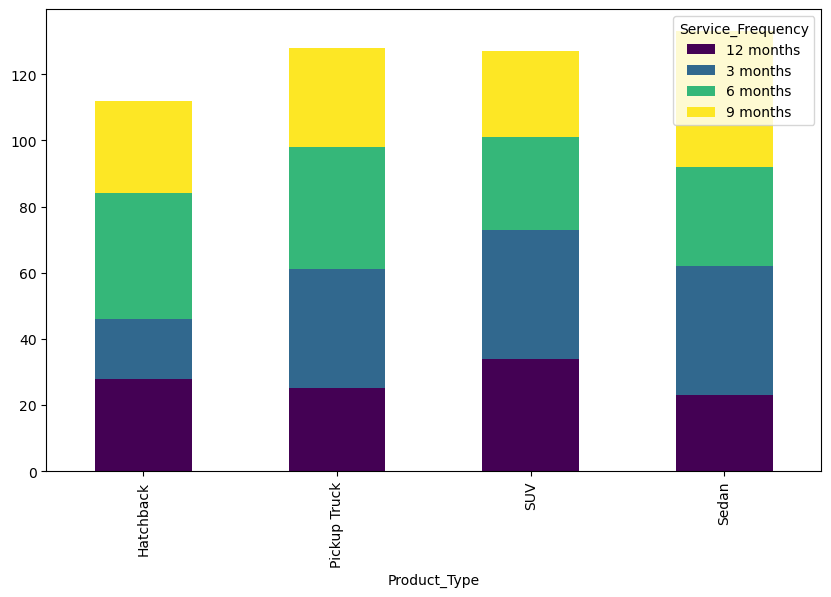

In [ ]:
high_frequency_product_type = high_frequency_product_type.reset_index(name='count')

pivot_data = high_frequency_product_type.pivot(index='Product_Type', columns='Service_Frequency', values='count')
pivot_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.show()

#### Product Type
Examine which product types require more after-sales service. Identify patterns of complaints or feedback for specific products to improve quality or service offerings.

In [ ]:
df.groupby(['Product_Type', 'Service_Value','Service_Unit'])['Feedback_Rating'].mean()

Product_Type  Service_Value  Service_Unit
Hatchback     12             months          2.678571
              3              months          2.888889
              6              months          3.052632
              9              months          3.178571
Pickup Truck  12             months          2.080000
              3              months          2.861111
              6              months          2.864865
              9              months          2.900000
SUV           12             months          3.088235
              3              months          2.846154
              6              months          3.035714
              9              months          3.153846
Sedan         12             months          3.217391
              3              months          3.435897
              6              months          3.266667
              9              months          2.926829
Name: Feedback_Rating, dtype: float64

From the above figure, it is evident that Hatchback, Pickup Truck -6,9,12 months require more frequent servicing like every 3 months.

In [199]:
# Lets find the correlation between factors affecting the service rating

#Lets ensure categorical variables are encoded
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Complaint_Flag'] = df['Complaint_Flag'].map({'Yes':1, 'No':0})
df['Complaint_Flag'] = df['Complaint_Flag'].astype(int)

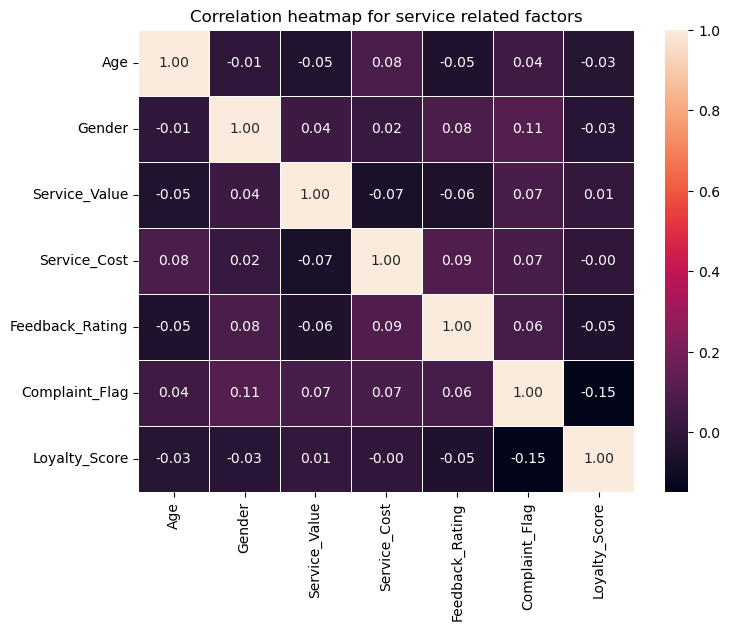

In [200]:
#Select numeric columns for correlation analysis
numeric_columns = ['Age', 'Gender', 'Service_Value', 'Service_Cost', 'Feedback_Rating', 'Complaint_Flag', 'Loyalty_Score']
correlation_matrix = df[numeric_columns].corr()

#Plot correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation heatmap for service related factors', fontsize=12)
plt.show()

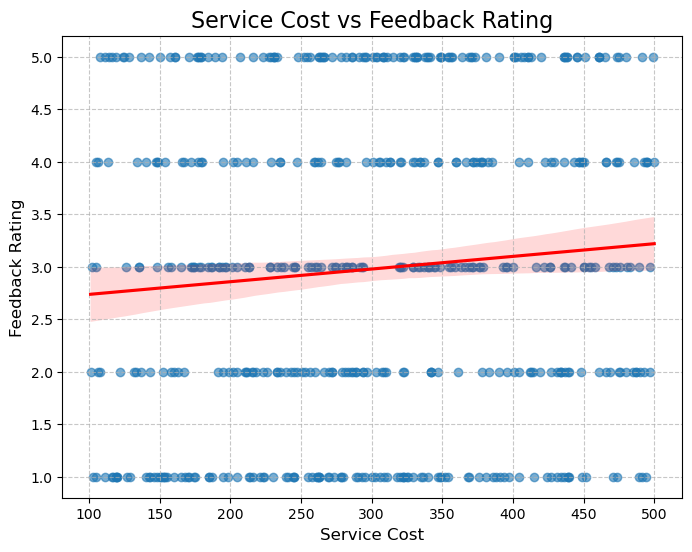

In [201]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Service_Cost', y='Feedback_Rating', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Service Cost vs Feedback Rating', fontsize=16)
plt.xlabel('Service Cost', fontsize=12)
plt.ylabel('Feedback Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [202]:
correlation = df[['Service_Cost', 'Feedback_Rating']].corr()
print(correlation)

                 Service_Cost  Feedback_Rating
Service_Cost         1.000000         0.090173
Feedback_Rating      0.090173         1.000000


In [203]:
print(df['Service_Cost'].max())
print(df['Service_Cost'].min())


500
101


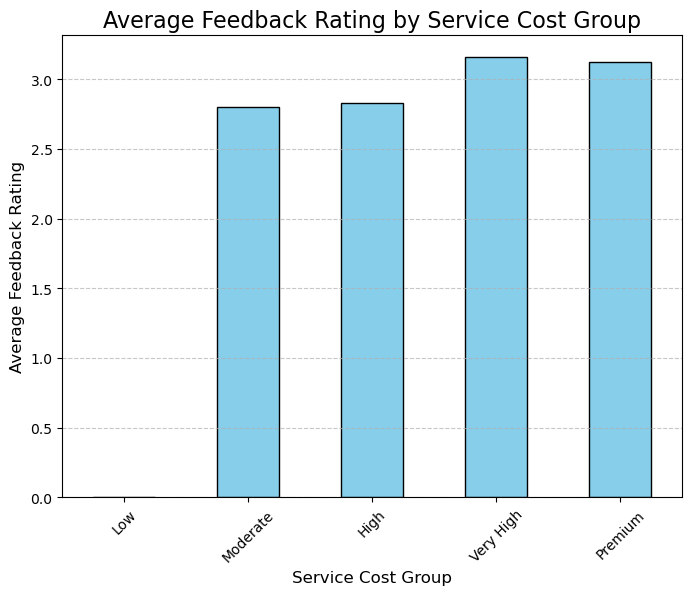

In [206]:
df['Service_Cost_Group'] = pd.cut(df['Service_Cost'], bins=[0, 100, 200, 300, 400, df['Service_Cost'].max()], 
                                  labels=['Low', 'Moderate', 'High', 'Very High', 'Premium'])

# Calculate the average rating for each cost group
cost_group_feedback = df.groupby('Service_Cost_Group')['Feedback_Rating'].mean()

# Display as a bar plot
plt.figure(figsize=(8, 6))
cost_group_feedback.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Feedback Rating by Service Cost Group', fontsize=16)
plt.xlabel('Service Cost Group', fontsize=12)
plt.ylabel('Average Feedback Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


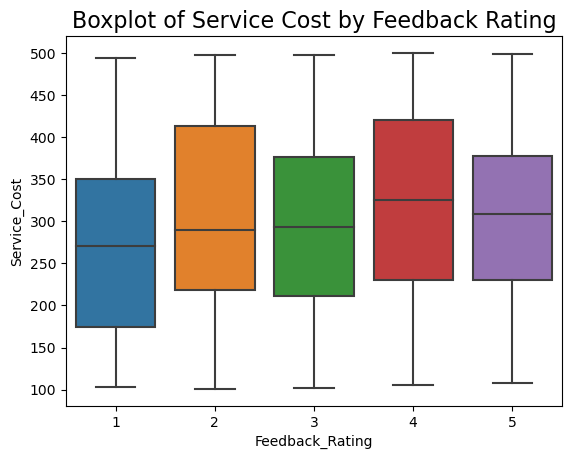

In [207]:
#Check for outliers in Service_Cost to see if exceptionally high costs correlate with lower feedback ratings.

sns.boxplot(x='Feedback_Rating', y='Service_Cost', data=df)
plt.title('Boxplot of Service Cost by Feedback Rating', fontsize=16)
plt.show()


In [208]:
from sklearn.linear_model import LinearRegression

# Prepare data for modeling
X = df[['Service_Cost']]
y = df['Feedback_Rating']

# Train a regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient (Service Cost): {model.coef_[0]}')


Intercept: 2.615906359061672
Coefficient (Service Cost): 0.0012065444471267962


A near-zero coefficient indicates minimal impact on Service rating
